## Hypothesis: The number of normal and intensive care hospital beds occupied by patients with COVID-19 and number of deaths of patients with COVID-19 in all Austria decreased overtime as the cumulative number of administered doses of the vaccine against COVID-19 increased.

In [16]:
!jt -t onedork

In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.colors
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#from ipywidgets import interact_manual, interact

from ipywidgets import HBox, VBox, Checkbox

In [2]:
covid_cases_age_group = pd.read_csv("../data/covid_data/CovidFaelle_Altersgruppe.csv", names=["time","agegroupID","agegroup","state","stateID","num_residents","sex","infected","cured","dead"], delimiter =";",skiprows= 1)
covid_cases_timeline = pd.read_csv("../data/covid_data/CovidFaelle_Timeline_edited_2.csv", names=["Time","state","stateID","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_days","daily_death_count","dead_sum","daily_healed","healed_sum"], delimiter =";",skiprows= 1)
covid_cases_timeline_groupby_disctrict = pd.read_csv("../data/covid_data/CovidFaelle_Timeline_GKZ.csv", names=["time","county","district_id","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_daysle","dead"], delimiter =";",skiprows= 1)
covid_test_data = pd.read_csv("../data/covid_data/CovidFallzahlen.csv", names=["date","num_tests","date_2","FZHosp","FZICU","FZHospFree","FZICUFree","stateID","state"], delimiter =";",skiprows= 1)
hospitalization_data = pd.read_csv("../data/covid_data/Hospitalisierung.csv", delimiter =";")
vaccine_data = pd.read_csv("../data/covid_data/COVID19_vaccination_doses_timeline_edited.csv", names=["date","state_id","state_name","vaccine","dose_number","doses_administered_cumulative"], delimiter =";",skiprows= 1)
demographics_data =  pd.read_csv("../data/covid_data/demographic_austria.csv", names=["state","2019","2020","2021","2022"], delimiter =";",skiprows= 1)                                                                                                          

In [3]:
hospitalization = hospitalization_data.copy()

hospitalization = hospitalization.rename(columns={'Meldedatum': 'date', 'BundeslandID': 'stateID','NormalBettenBelCovid19': 'occupied_normal_beds','IntensivBettenBelCovid19': 'occupied_intensive_care_beds'})

hospitalization = hospitalization.drop(columns=['Bundesland', 'IntensivBettenKapGes', 'IntensivBettenBelNichtCovid19','IntensivBettenFrei','TestGesamt'])


hospitalization['date'] = pd.to_datetime(hospitalization['date'])
hospitalization.set_index('date', inplace=True)

mask = hospitalization['stateID'].eq(10)
hospitalization = hospitalization.loc[mask]
hospitalization = hospitalization.drop(columns=['stateID'])
dates = pd.date_range('2020-01-01', '2021-01-23', freq='D')
hospitalization_added = hospitalization.reindex(dates, fill_value=0)
hospitalization = pd.concat([hospitalization_added, hospitalization])

hospitalization

,occupied_normal_beds,occupied_intensive_care_beds
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
2020-01-05,0,0
...,...,...
2022-07-11,1172,85
2022-08-11,1112,78
2022-09-11,1057,73
2022-10-11,995,64


In [4]:
vaccine = vaccine_data.copy()
vaccine = vaccine.drop(columns=['state_name', 'vaccine', 'dose_number'])

mask = vaccine['state_id'].eq(10)
vaccine = vaccine.loc[mask]

vaccine['date'] = pd.to_datetime(vaccine['date'])
vaccine = vaccine[(vaccine['date'] > '2020-01-01') & (vaccine['date'] <= '2022-11-11')]
vaccine.set_index('date', inplace=True)
vaccine = vaccine['doses_administered_cumulative'].resample('D').apply(sum).to_frame()

dates = pd.date_range('2020-01-01', '2020-12-26', freq='D')
vaccine_added = vaccine.reindex(dates, fill_value=0)

vaccine = pd.concat([vaccine_added, vaccine])


vaccine


,doses_administered_cumulative
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2022-11-06,19870104
2022-11-07,19880155
2022-11-08,19896410
2022-11-09,19913386


In [5]:
daily_death_cop = covid_cases_timeline.copy()

daily_death_cop = daily_death_cop.rename(columns={'Time': 'date'})
daily_death = daily_death_cop.loc[:, ['date','daily_death_count', 'stateID']]


mask = daily_death['stateID'].eq(10)
daily_death = daily_death.loc[mask]
daily_death = daily_death.drop(columns=['stateID'])


daily_death['date'] = pd.to_datetime(daily_death['date'], infer_datetime_format=True)
daily_death.set_index('date', inplace=True)

dates = pd.date_range('2020-01-01', '2020-02-25', freq='D')
daily_death_added = daily_death.reindex(dates, fill_value=0)
daily_death = pd.concat([daily_death_added, daily_death])

daily_death

,daily_death_count
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
...,...
2022-11-06,2.0
2022-11-07,4.0
2022-11-08,8.0
2022-11-09,8.0


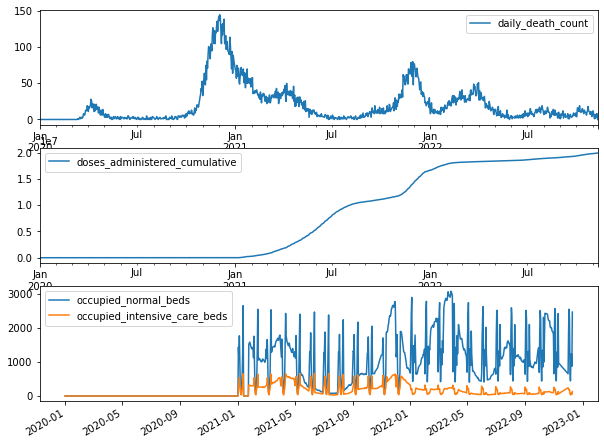

In [6]:

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, figsize=(10, 8))

# Plot the first DataFrame in the first subplot
daily_death.plot(ax=axs[0])

# Plot the second DataFrame in the second subplot
vaccine.plot(ax=axs[1])

# Plot the third DataFrame in the third subplot
hospitalization.plot(ax=axs[2])

# Show the plot
plt.show()


In [7]:
daily_death =daily_death.reset_index()

vaccine = vaccine.reset_index()

hospitalization = hospitalization.reset_index() 


In [8]:
daily_death.to_csv("../data/felix_to_tableau/daily_death.csv", index=False)
vaccine.to_csv("../data/felix_to_tableau/vaccine.csv", index=False)
hospitalization.to_csv("../data/felix_to_tableau/hospitalization.csv", index=False)

In [25]:
# load final data

final = pd.read_csv("../data/felix_to_tableau/final_tableau.csv", delimiter =";")

final = final.rename(columns={'index': 'date'})
final['date'] = pd.to_datetime(final['date'], infer_datetime_format=True)
final.set_index('date', inplace=True)
final

,doses_administered_cumulative,daily_death_count,occupied_normal_beds,occupied_intensive_care_beds
date,,,,
2020-01-01,0,0,0,0
2020-01-02,0,0,0,0
2020-01-03,0,0,0,0
2020-01-04,0,0,0,0
2020-01-05,0,0,0,0
...,...,...,...,...
2022-11-06,19870104,2,1224,85
2022-11-07,19880155,4,1172,85
2022-11-08,19896410,8,1112,78


In [42]:
final_edited = pd.read_csv("../data/felix_to_tableau/final_tableau_edited.csv", delimiter =";")

final_edited = final_edited.rename(columns={'index': 'date'})
final_edited['date'] = pd.to_datetime(final_edited['date'], infer_datetime_format=True)
final_edited.set_index('date', inplace=True)
final_edited

,doses_administered_cumulative,daily_death_count,occupied_normal_beds,occupied_intensive_care_beds
date,,,,
2020-07-01,0,1,0,0
2020-07-02,0,3,0,0
2020-07-03,0,1,0,0
2020-07-04,0,3,0,0
2020-07-05,0,0,0,0
...,...,...,...,...
2022-11-06,19870104,2,1224,85
2022-11-07,19880155,4,1172,85
2022-11-08,19896410,8,1112,78


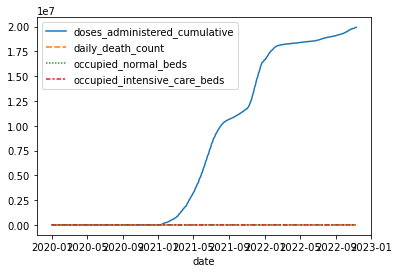

In [26]:
columns = ['doses_administered_cumulative', 'daily_death_count', 'occupied_normal_beds', 'occupied_intensive_care_beds']

# Create a form to select the columns to display
form = VBox([Checkbox(description=col, value=True) for col in columns])

# Define a function to update the plot
def update_plot(form):
    # Get the selected columns
    selected_columns = [col for col, checkbox in zip(columns, form.children) if checkbox.value]
    
    # Create the plot
    ax = sns.lineplot(data=final[selected_columns])
    
    # Show the plot
    plt.show()

# Initialize the plot
update_plot(form)

# Connect the form to the update function
form.observe(update_plot, names='value')

# Display the form
display(form)

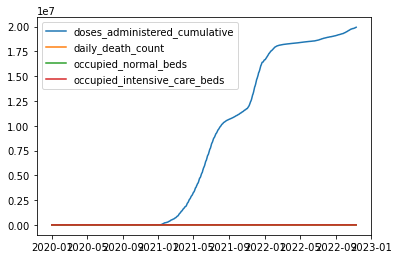

In [27]:
# Create a form to select the columns to display
form = VBox([Checkbox(description=col, value=True) for col in columns])

# Define a function to update the plot
def update_plot(form):
    # Get the selected columns
    selected_columns = [col for col, checkbox in zip(columns, form.children) if checkbox.value]
    
    # Clear the current plot
    plt.clf()
    
    # Create the plot
    for col in selected_columns:
        plt.plot(final.index, final[col], label=col)
    
    # Show the plot
    plt.legend()
    plt.show()

# Initialize the plot
update_plot(form)

# Connect the form to the update function
form.observe(update_plot, names='value')

# Display the form
display(form)


In [41]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final.index, y=final['doses_administered_cumulative'], name="doses_administered_cumulative"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final.index, y=final['daily_death_count'], name="daily_death_count"),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=final.index, y=final['occupied_normal_beds'], name="occupied_normal_beds"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=final.index, y=final['occupied_intensive_care_beds'], name="occupied_intensive_care_beds"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="Cummulative COVID-19 vaccines against daily death rate, occupied intensive and normal hospital beds "
)

# Set x-axis title
fig.update_xaxes(title_text="Time")

# Set y-axes titles
fig.update_yaxes(title_text="Cummulated number of vaccines", secondary_y=False)
fig.update_yaxes(title_text="Cases", secondary_y=True)

fig.show()

In [43]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final_edited.index, y=final_edited['doses_administered_cumulative'], name="doses_administered_cumulative"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final_edited.index, y=final_edited['daily_death_count'], name="daily_death_count"),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=final_edited.index, y=final_edited['occupied_normal_beds'], name="occupied_normal_beds"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=final_edited.index, y=final_edited['occupied_intensive_care_beds'], name="occupied_intensive_care_beds"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="Cummulative COVID-19 vaccines against daily death rate, occupied intensive and normal hospital beds")

# Set x-axis title
fig.update_xaxes(title_text="Time")

# Set y-axes titles
fig.update_yaxes(title_text="Cummulated number of vaccines", secondary_y=False)
fig.update_yaxes(title_text="Cases", secondary_y=True)

fig.show()

In [44]:
#import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['doses_administered_cumulative'],
    name="yaxis1 data"
))


fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['occupied_normal_beds'],
    name="yaxis2 data",
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['daily_death_count'],
    name="yaxis3 data",
    yaxis="y3"
))

fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['occupied_intensive_care_beds'],
    name="yaxis4 data",
    yaxis="y4"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.3, 0.7]
    ),
    yaxis=dict(
        title="yaxis title",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="yaxis2 title",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.15
    ),
    yaxis3=dict(
        title="yaxis3 title",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    yaxis4=dict(
        title="yaxis4 title",
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        anchor="free",
        overlaying="y",
        side="right",
        position=0.85
    )
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)

fig.show()

In [47]:
#import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['doses_administered_cumulative'],
    name="yaxis1 data"
))


fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['occupied_normal_beds'],
    name="yaxis2 data",
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['daily_death_count'],
    name="yaxis3 data",
    yaxis="y3"
))

fig.add_trace(go.Scatter(
    x=final_edited.index,
    y=final_edited['occupied_intensive_care_beds'],
    name="yaxis3 data",
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.3, 0.7]
    ),
    yaxis=dict(
        title="yaxis title",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="yaxis2 title",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.15
    ),
    yaxis3=dict(
        title="yaxis3 title",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=1000,
)

fig.show()